In [1]:
import pandas as pd

from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import set_config
set_config(transform_output="pandas")

import seaborn as sns
import matplotlib.pyplot as plt
import random
from math import pi


url = 'https://drive.google.com/file/d/1c3dO4650DYAjqdlK4egsKORiRfdimEjB/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
songs = pd.read_csv(path)

# Computing distances

In [2]:
songs.columns = songs.columns.str.replace(' ', '')

In [3]:
songs

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


In [ ]:
songs.drop(['type','id','html'],axis=1,inplace=True)

In [ ]:
songs.set_index(['name', 'artist'],inplace=True)


In [ ]:
songs.head(2)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4


In [ ]:
songs_scaler = MinMaxScaler().set_output(transform='pandas')

In [ ]:
songs_scaler.fit(songs)

MinMaxScaler()

In [ ]:
songs_scaled = songs_scaler.transform(songs)

In [ ]:
songs_scaled

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8
Mulher Eu Sei,Chico César,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8
Rosa Morena,Kurt Elling,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6


Text(0.5, 1.0, 'Data with MinMaxScaler')

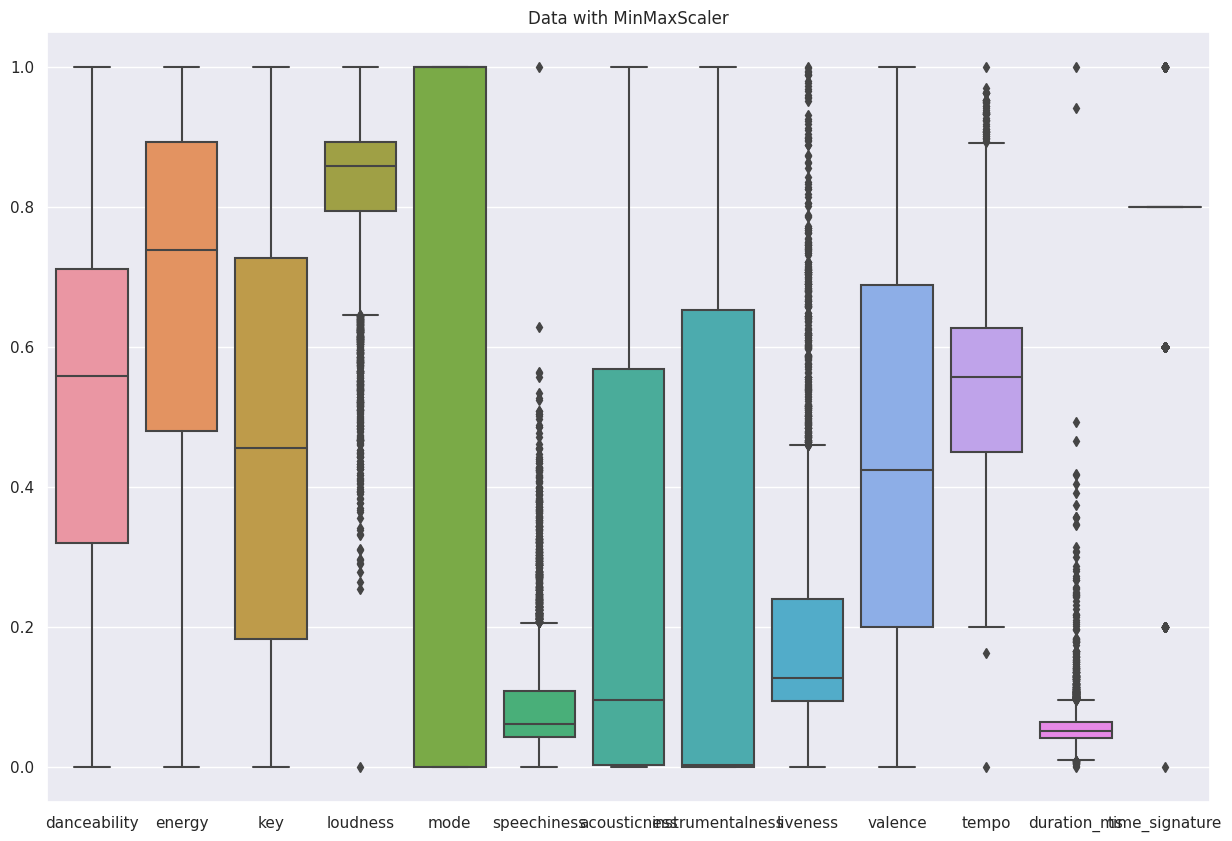

In [ ]:
songs_scaled_minmax = pd.DataFrame(songs_scaled, columns = songs.columns, index = songs.index)
plt.subplots(figsize=(15, 10))
sns.boxplot(data=songs_scaled_minmax.loc[:, songs.columns]).set_title('Data with MinMaxScaler')

In [ ]:
songs.drop(['loudness', 'speechiness', 'time_signature','liveness', 'tempo', 'duration_ms'],axis=1,inplace=True)

In [ ]:
songs_dist = pd.DataFrame(pairwise_distances(songs_scaled),
                    index=songs_scaled.index,
                    columns=songs_scaled.index)
songs_dist

,name,Se Eu Quiser Falar Com Deus,Saudade De Bahia,"Canta Canta, Minha Gente",Mulher Eu Sei,Rosa Morena,Desafinado,Madalena,O Meu Amor É Glòria,Brigas Nunca Mais,Previsao,...,"Symphony No. 3 - ""Chant de la nuit"", Op. 27: Largo...","Pines Of Rome, P. 141: 3. The Pines Of The Janiculum","Don Giovanni, K.527: Overture","Music for Strings, Percussion and Celesta, BB 114: II. Allegro",A Flock Descends Into The Pentagonal Garden,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49","Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique","Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)","Serenade For Strings In E, Op.22, B. 52: 1. Moderato","Ravel: Boléro, M. 81"
,artist,Gilberto Gil,Antônio Carlos Jobim,Martinho Da Vila,Chico César,Kurt Elling,Stan Getz,Maria Gasolina,Sílvia Pérez Cruz,Paula Morelenbaum,Bossacucanova,...,Karol Szymanowski,Ottorino Respighi,Wolfgang Amadeus Mozart,Béla Bartók,Toru Takemitsu,Pyotr Ilyich Tchaikovsky,Tristan Murail,Arnold Schoenberg,Antonín Dvořák,Maurice Ravel
name,artist,,,,,,,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.000000,1.691234,1.789295e+00,1.377812,1.442124e+00,1.574117,1.082512,1.396036,1.440599,1.763709,...,1.500177,1.888451,1.825396,1.375091,1.521766,1.821519,1.631119,1.931411,1.731210,1.529595
Saudade De Bahia,Antônio Carlos Jobim,1.691234,0.000000,6.025589e-01,0.850116,9.021008e-01,0.884168,1.572105,1.070503,0.800979,0.767293,...,1.173265,1.554014,1.241961,1.861452,1.788592,1.400739,1.298251,1.834972,1.358767,1.163194
"Canta Canta, Minha Gente",Martinho Da Vila,1.789295,0.602559,4.214685e-08,1.022168,1.084682e+00,1.077646,1.602788,0.841850,0.954017,0.696109,...,1.420101,1.755208,1.414682,1.984332,1.949291,1.601395,1.518890,2.009627,1.578557,1.373982
Mulher Eu Sei,Chico César,1.377812,0.850116,1.022168e+00,0.000000,3.808181e-01,0.474649,1.314011,0.996884,0.975533,1.008997,...,0.924683,1.230588,1.034616,1.601424,1.521450,1.085913,0.951404,1.484489,0.991801,0.780276
Rosa Morena,Kurt Elling,1.442124,0.902101,1.084682e+00,0.380818,4.214685e-08,0.386737,1.225970,1.100979,0.851929,1.018555,...,0.755458,1.132246,1.000967,1.473302,1.446238,0.999850,0.784697,1.344057,0.895866,0.755666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1.821519,1.400739,1.601395e+00,1.085913,9.998496e-01,0.807299,1.534054,1.585189,1.469239,1.206218,...,0.838965,0.281719,0.478634,1.327830,1.027338,0.000000,0.411291,0.761725,0.338770,0.511917
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,1.631119,1.298251,1.518890e+00,0.951404,7.846973e-01,0.711710,1.404861,1.430155,1.244712,1.202001,...,0.475449,0.527499,0.731835,1.295124,1.060009,0.411291,0.000000,0.776493,0.305891,0.442495


In [ ]:
plt.subplots(figsize=(12, 8))
sns.heatmap(songs_dist);

Output hidden; open in https://colab.research.google.com to view.

# K-Means

In [ ]:
songs_norm = MinMaxScaler().set_output(transform='pandas').fit_transform(songs)

## Finding inertia by Elbow method

In [ ]:
inertia_list = []

for i in range(1,30):
    myKMeans = KMeans(n_clusters=i, n_init=10)
    myKMeans.fit(songs_norm)
    inertia_list.append(round(myKMeans.inertia_))
print(inertia_list)

[4276, 3063, 2342, 1928, 1720, 1522, 1346, 1208, 1114, 1025, 950, 902, 856, 817, 774, 747, 716, 691, 669, 658, 642, 623, 605, 591, 576, 569, 554, 551, 537]


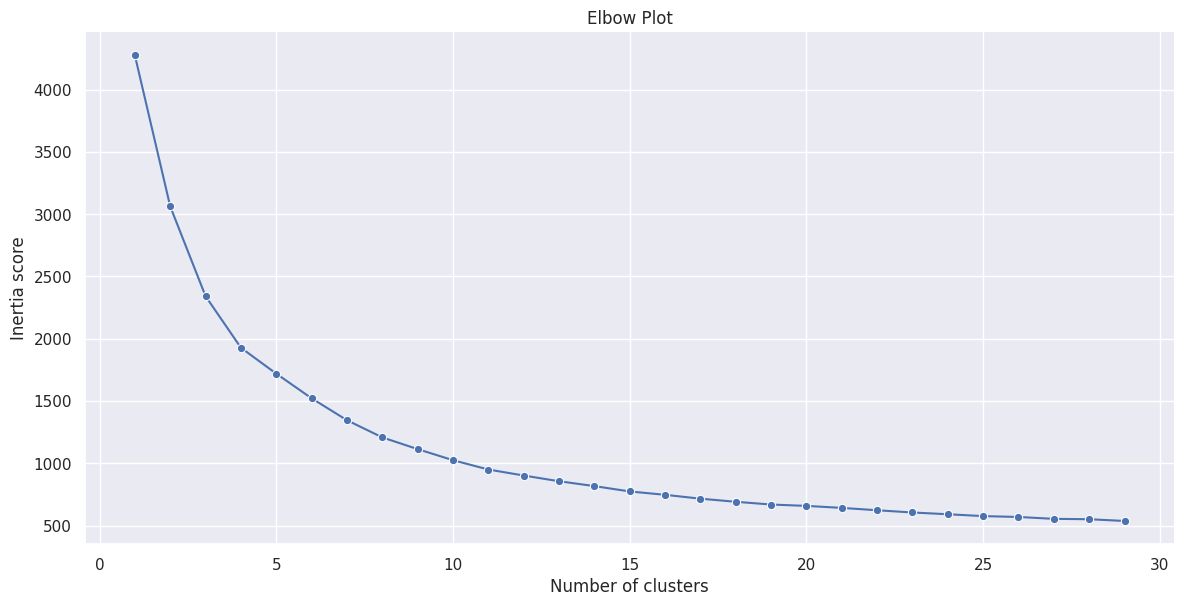

In [ ]:
sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(1,30),y=inertia_list,marker='o',height=6,aspect=2)
    .set(title=f"Elbow Plot")
    .set_axis_labels("Number of clusters", "Inertia score")
);

In [ ]:
silhouette_scores = []

for i in range(2, 30):
    myKMeans = KMeans(n_clusters=i, n_init=15)
    myKMeans.fit(songs_norm)
    labels = myKMeans.predict(songs_norm)
    score = silhouette_score(songs_norm, labels)
    silhouette_scores.append(score)


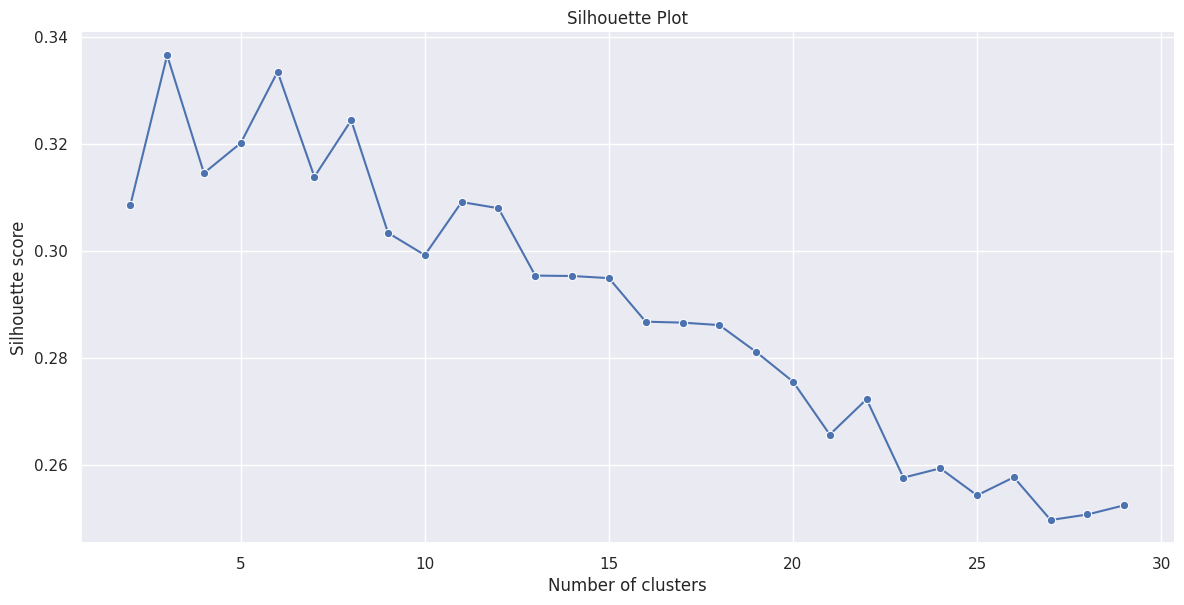

In [ ]:
sns.set_theme(style='darkgrid')
(sns.relplot(kind='line',x=range(2,30),y=silhouette_scores, marker='o',height=6,aspect=2)
    .set(title=f"Silhouette Plot")
    .set_axis_labels("Number of clusters", "Silhouette score")
);

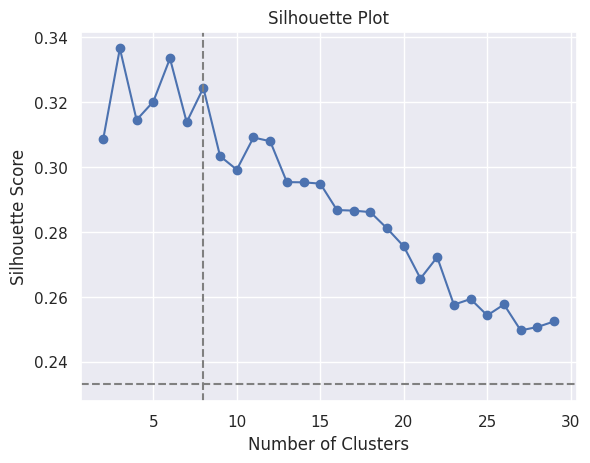

In [ ]:

plt.plot(range(2, 30), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot')
plt.axvline(x=8, linestyle='--', color='gray')
plt.axhline(y=0.233, linestyle='--', color='gray')
plt.show()

In [ ]:
silhouette_scores

[0.30851946818348996,
 0.3365464708322554,
 0.3145225472071789,
 0.3201421403758019,
 0.33347059621284675,
 0.31382544467156964,
 0.3243947540669323,
 0.30335208829995153,
 0.29919596634335355,
 0.3091083426487871,
 0.30795190802028805,
 0.29535728206445117,
 0.2952847455005344,
 0.2948861048363986,
 0.28674400162329977,
 0.2865680102972133,
 0.28610681614934036,
 0.28108464767667524,
 0.2755425328587254,
 0.26563977030090113,
 0.27224247903681503,
 0.25758341364907333,
 0.2593281030342822,
 0.2542781295323001,
 0.2576568011541548,
 0.24966428903231155,
 0.2506984676136573,
 0.2524187446991854]

* For k = 2 the average to silhouette is: 0.3085
	- For cluster = 0 the silhouette value is: 0.3
	- For cluster = 1 the silhouette value is: 0.32
* For k = 3 the average to silhouette is: 0.3365
	- For cluster = 0 the silhouette value is: 0.34
	- For cluster = 1 the silhouette value is: 0.27
	- For cluster = 2 the silhouette value is: 0.36
* For k = 4 the average to silhouette is: 0.3145
	- For cluster = 0 the silhouette value is: 0.31
	- For cluster = 1 the silhouette value is: 0.32
	- For cluster = 2 the silhouette value is: 0.27
	- For cluster = 3 the silhouette value is: 0.35
* For k = 5 the average to silhouette is: 0.3201
	- For cluster = 0 the silhouette value is: 0.32
	- For cluster = 1 the silhouette value is: 0.26
	- For cluster = 2 the silhouette value is: 0.33
	- For cluster = 3 the silhouette value is: 0.37
	- For cluster = 4 the silhouette value is: 0.34
* For k = 6 the average to silhouette is: 0.3336
	- For cluster = 0 the silhouette value is: 0.32
	- For cluster = 1 th

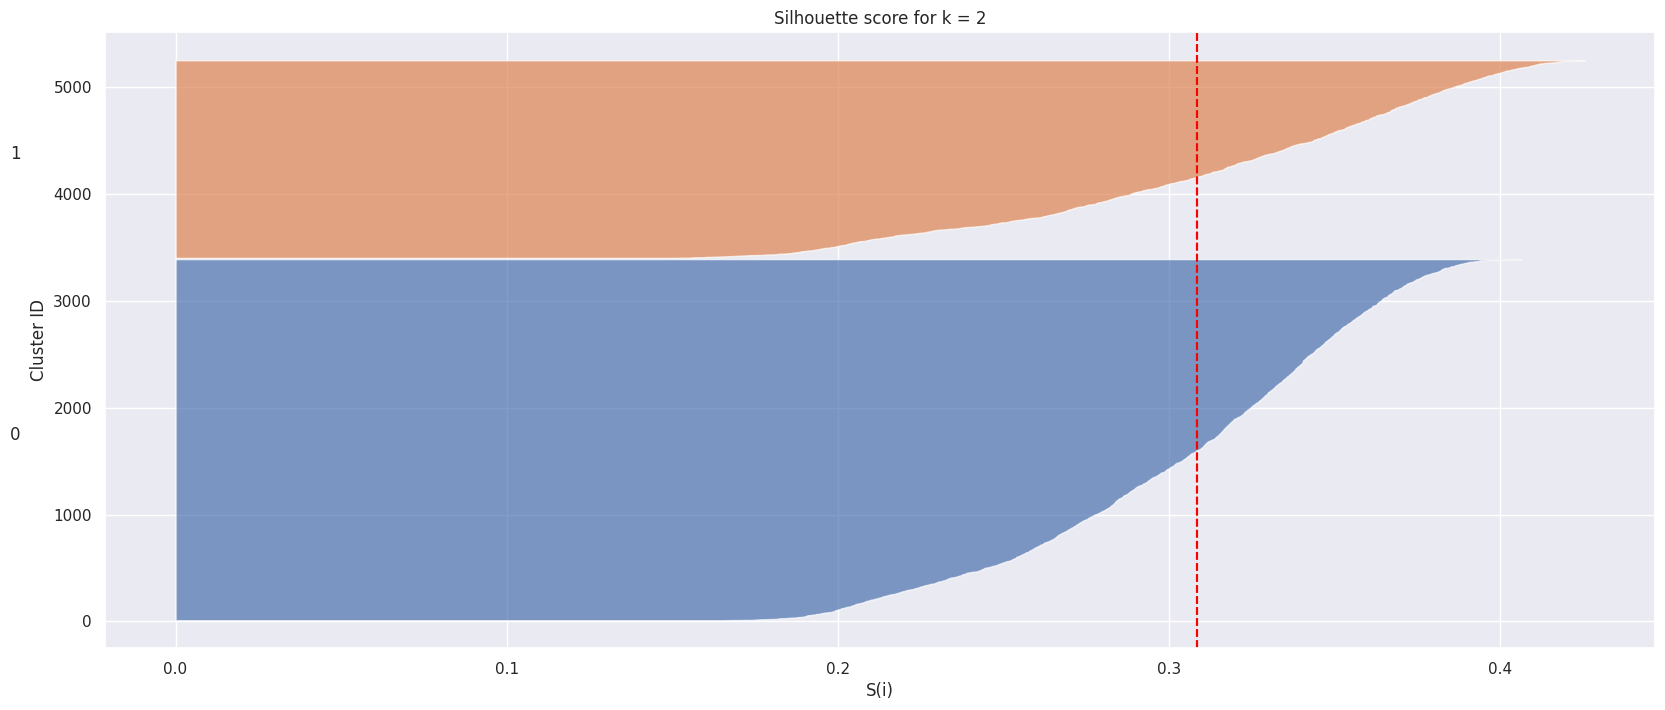

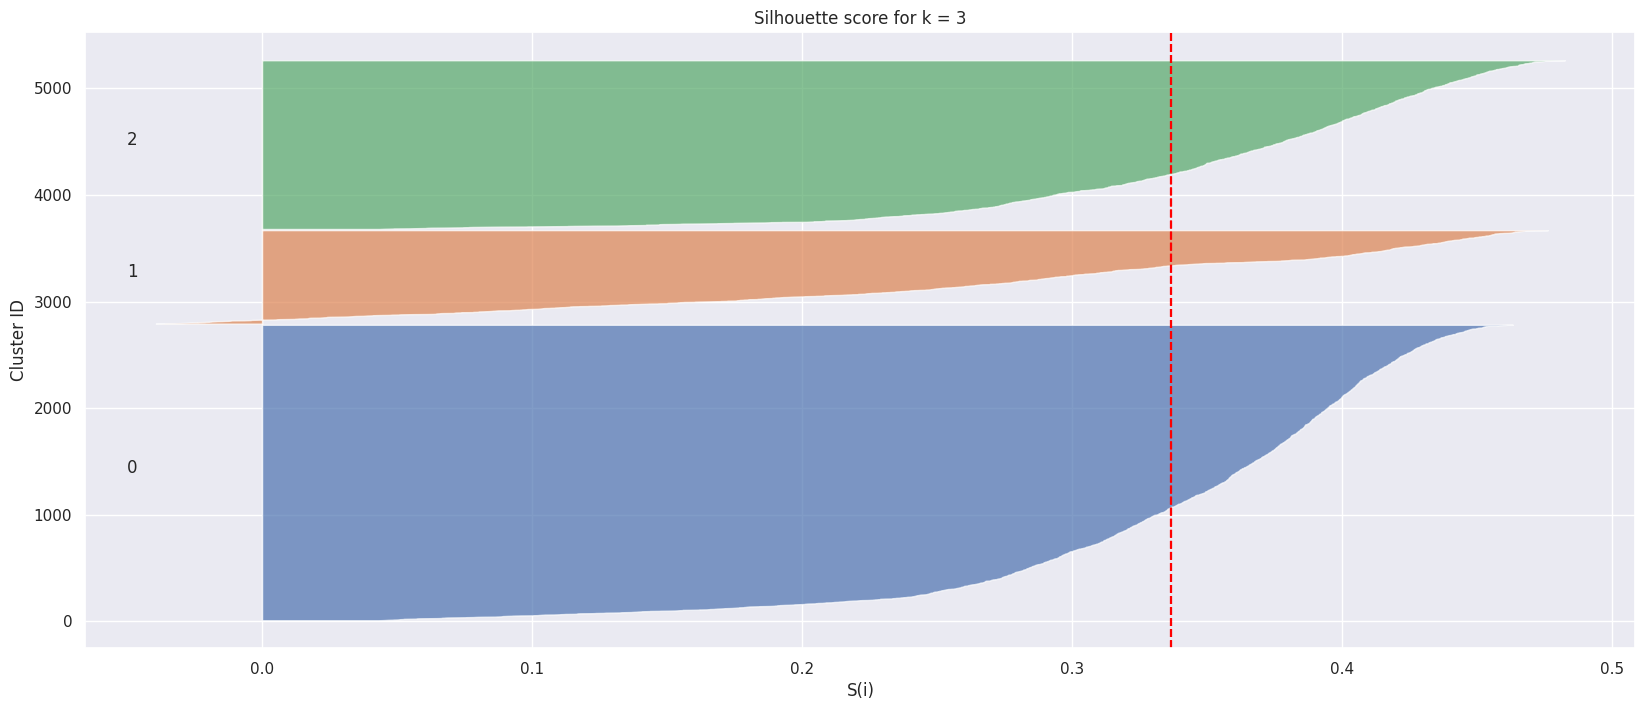

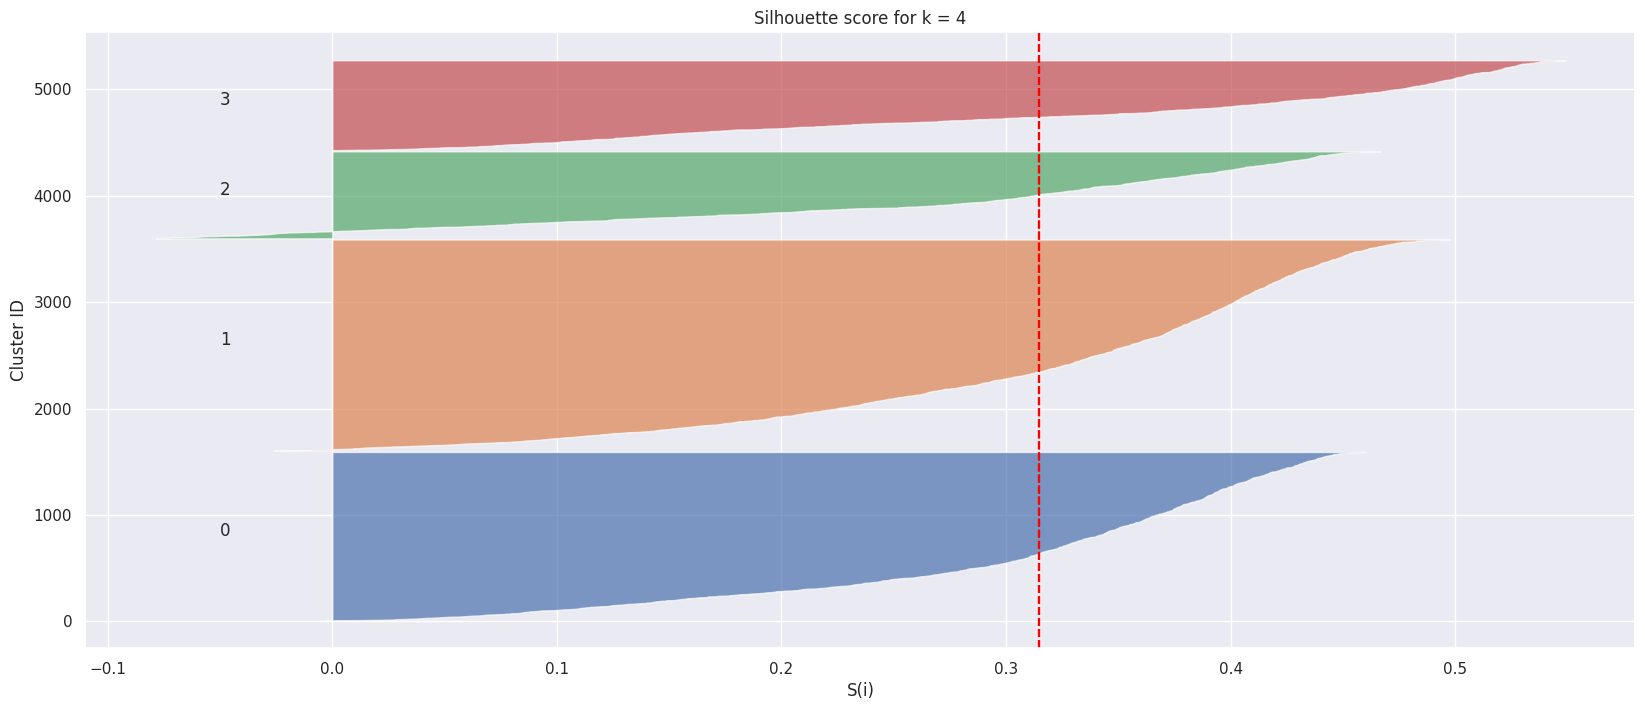

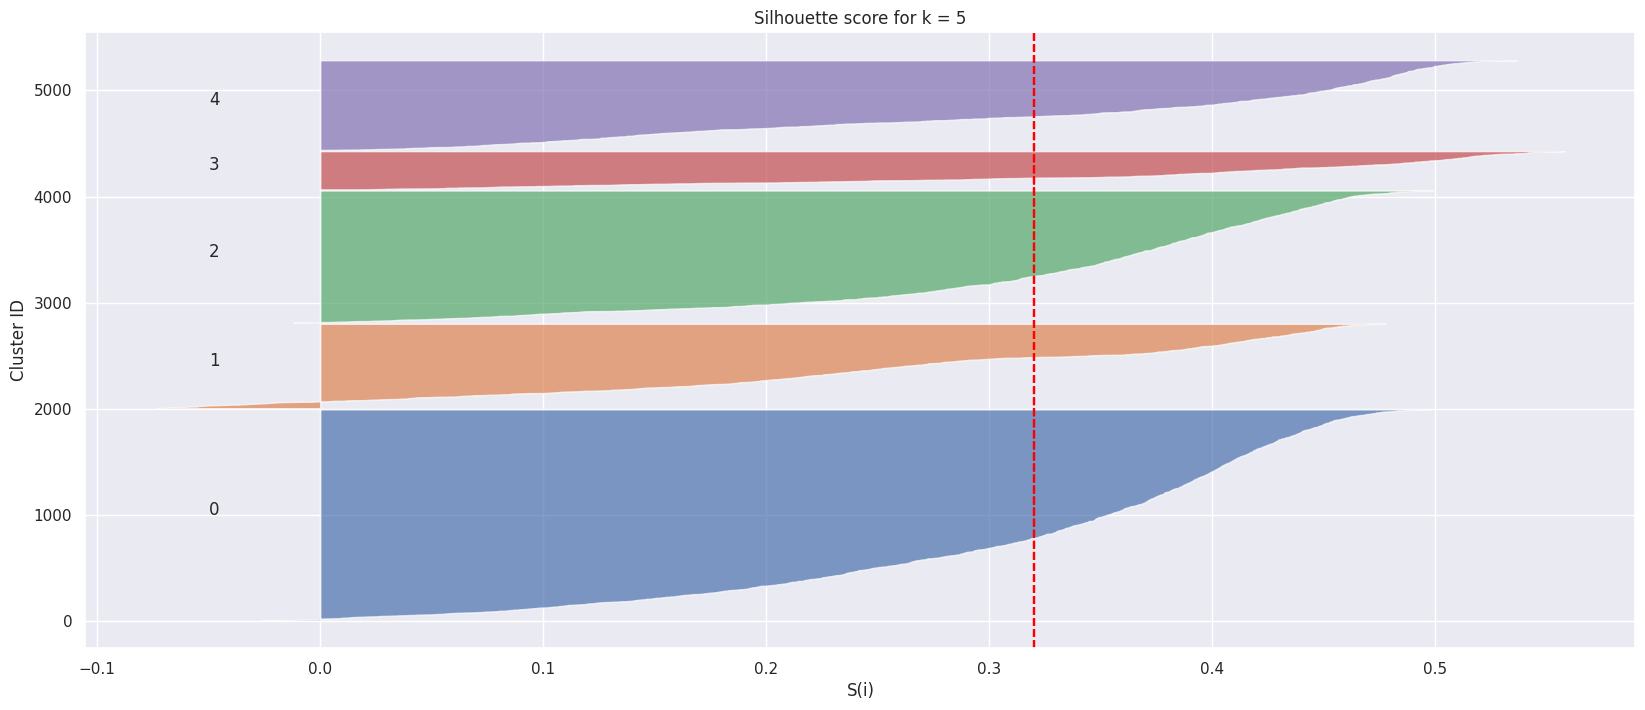

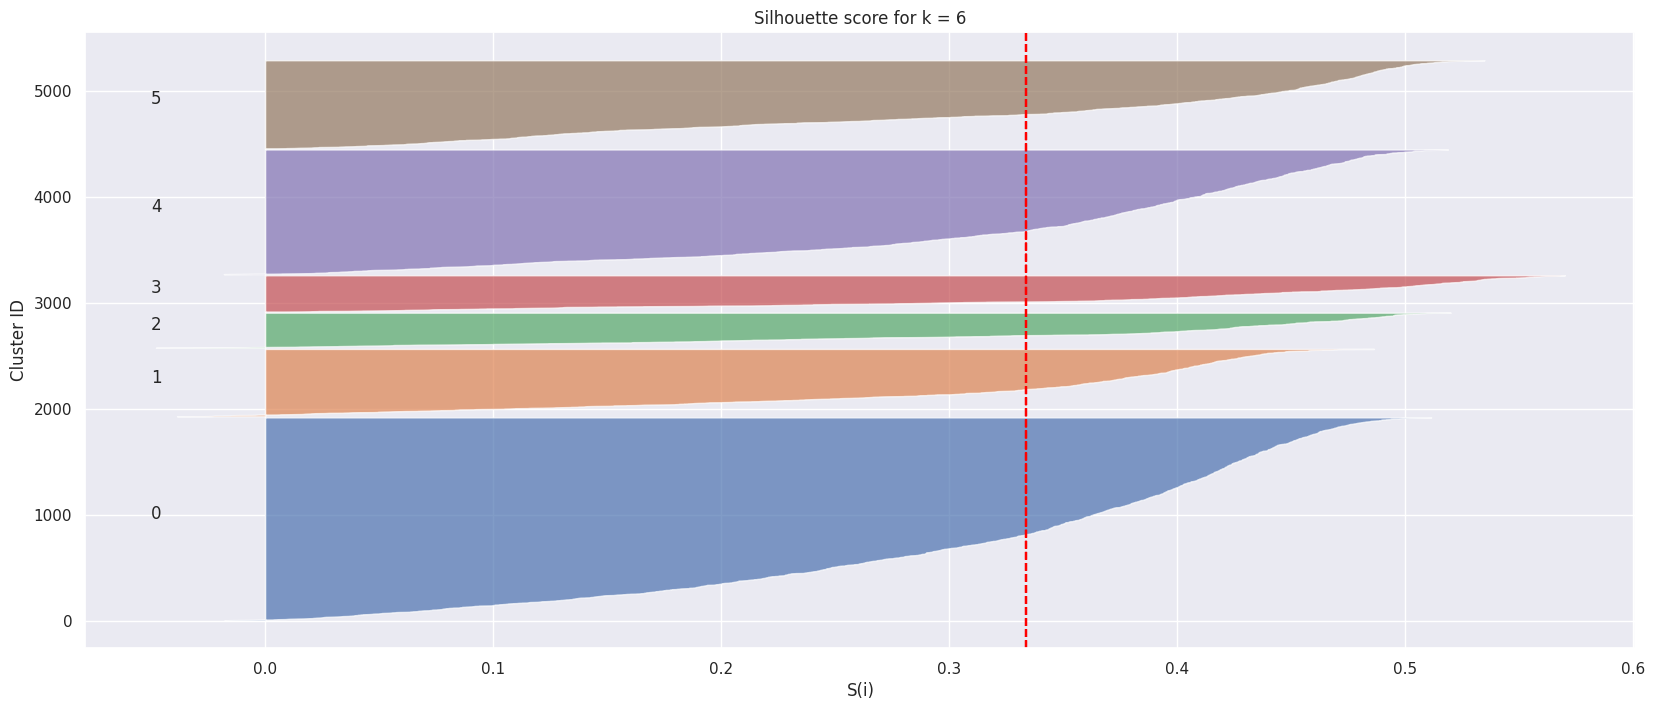

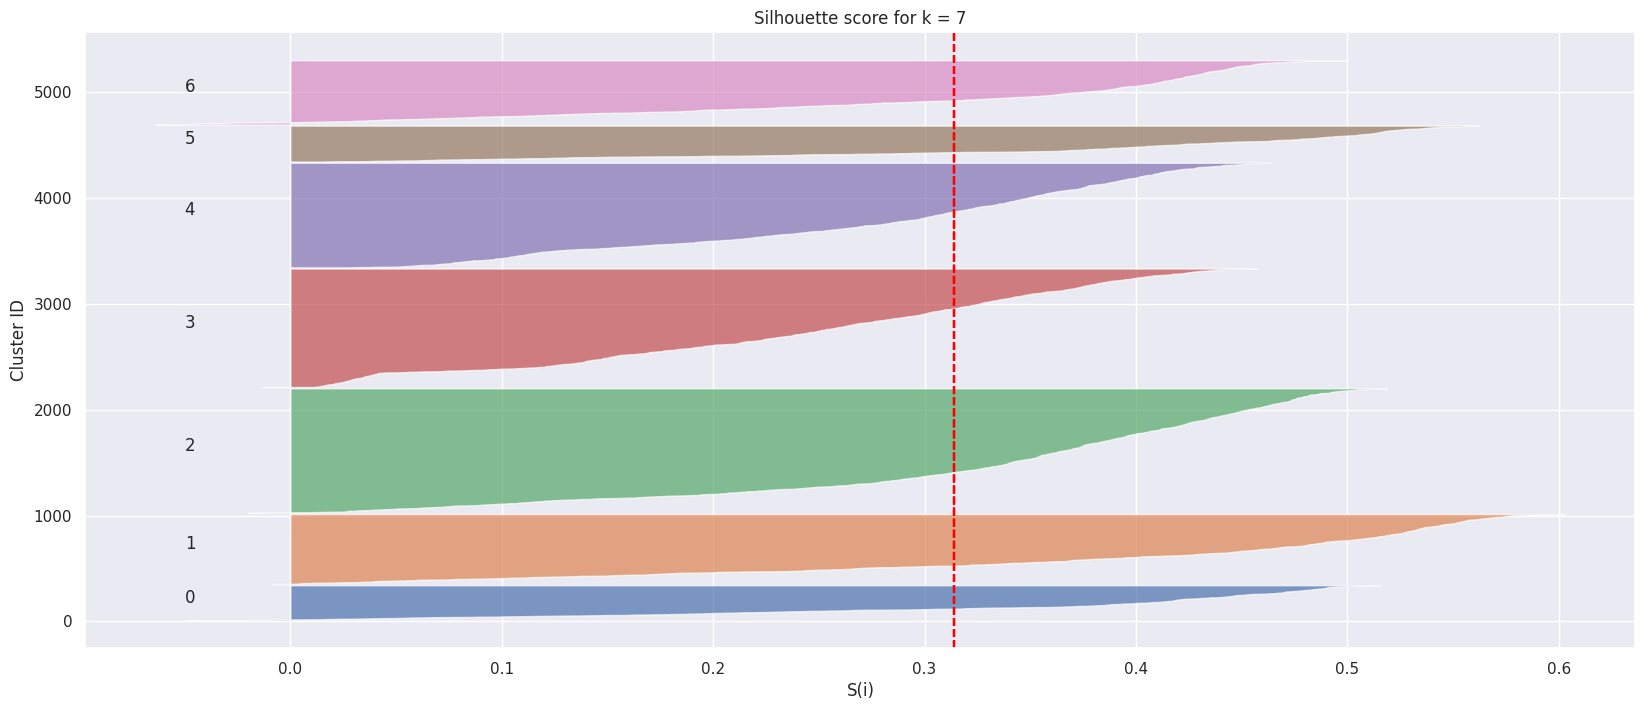

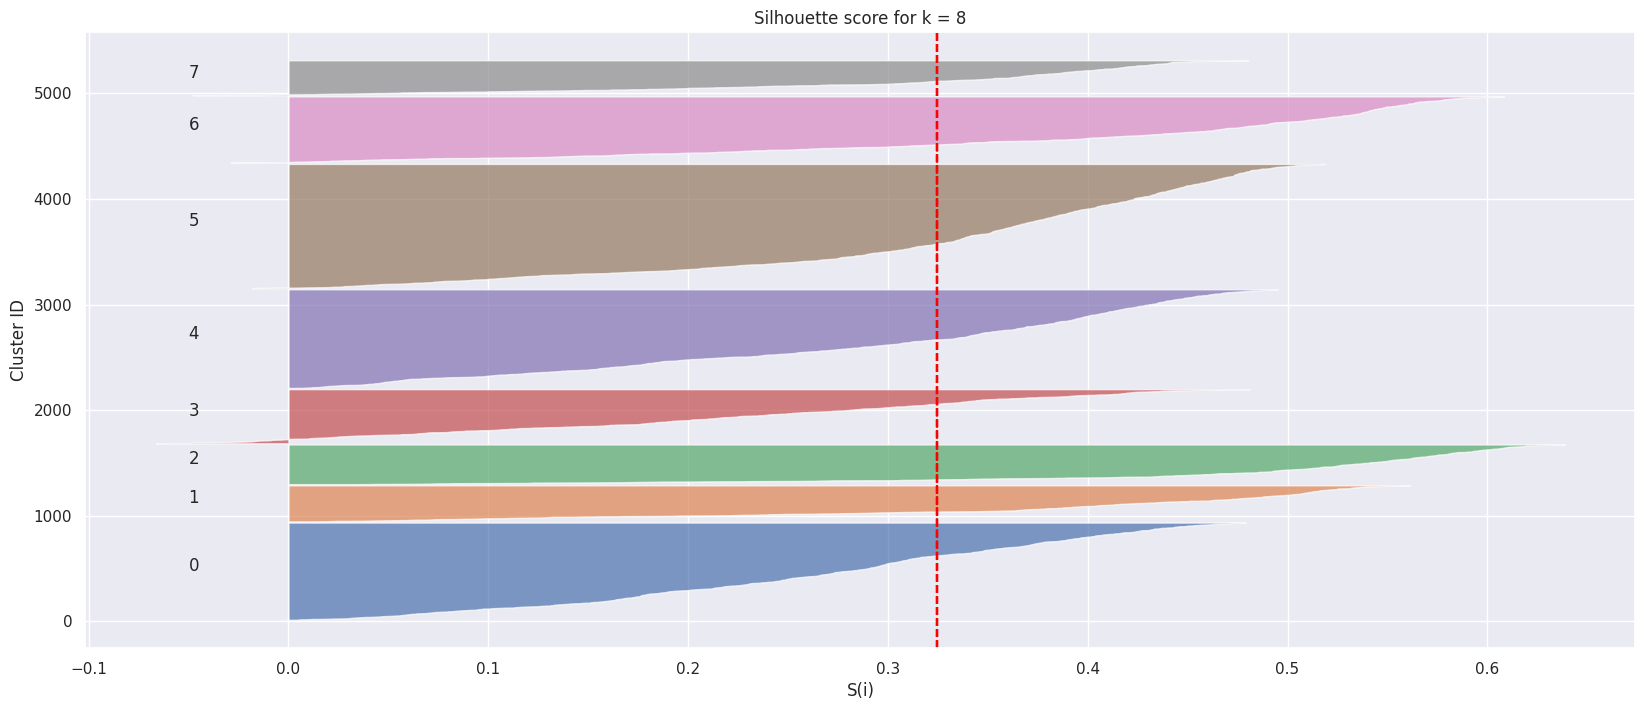

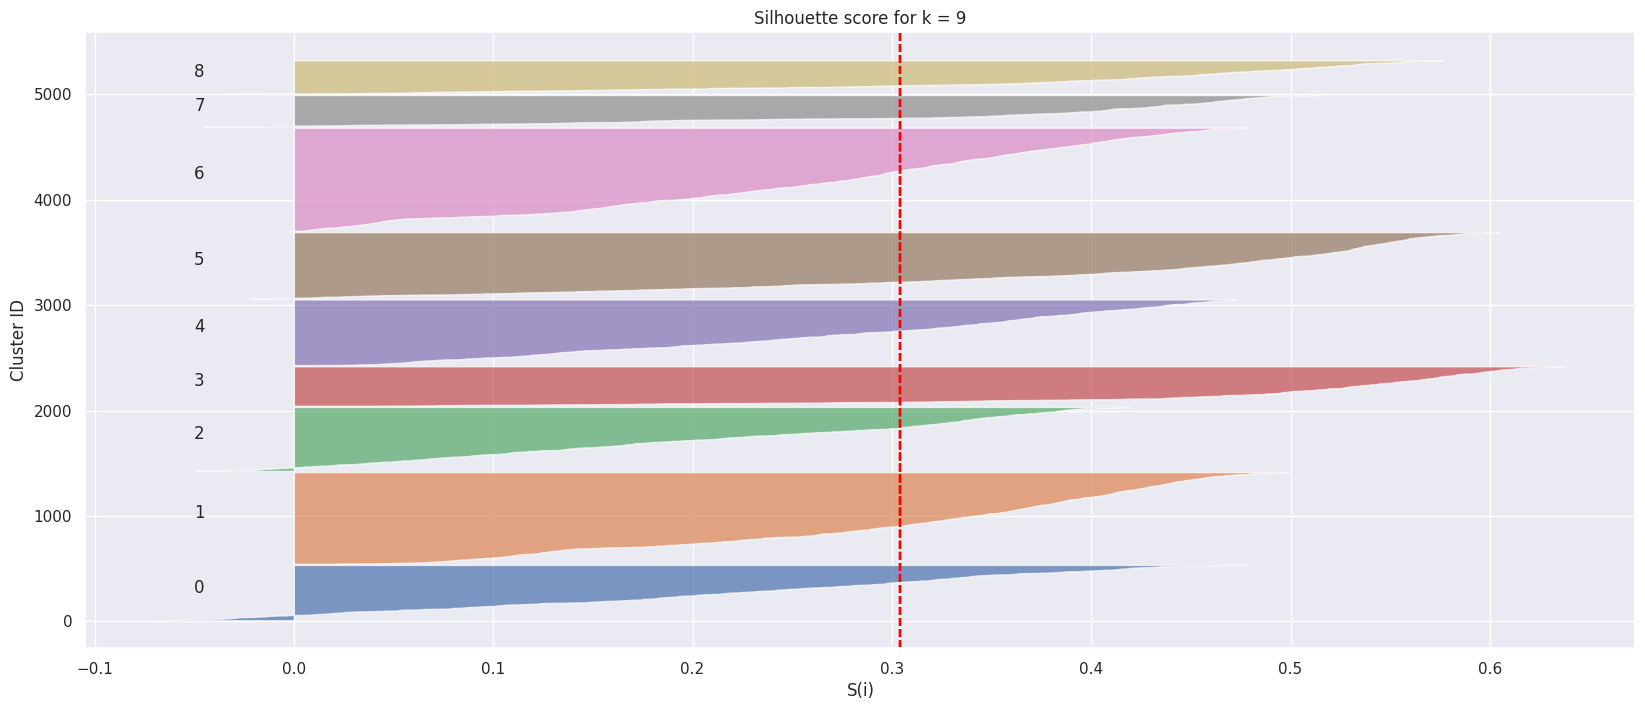

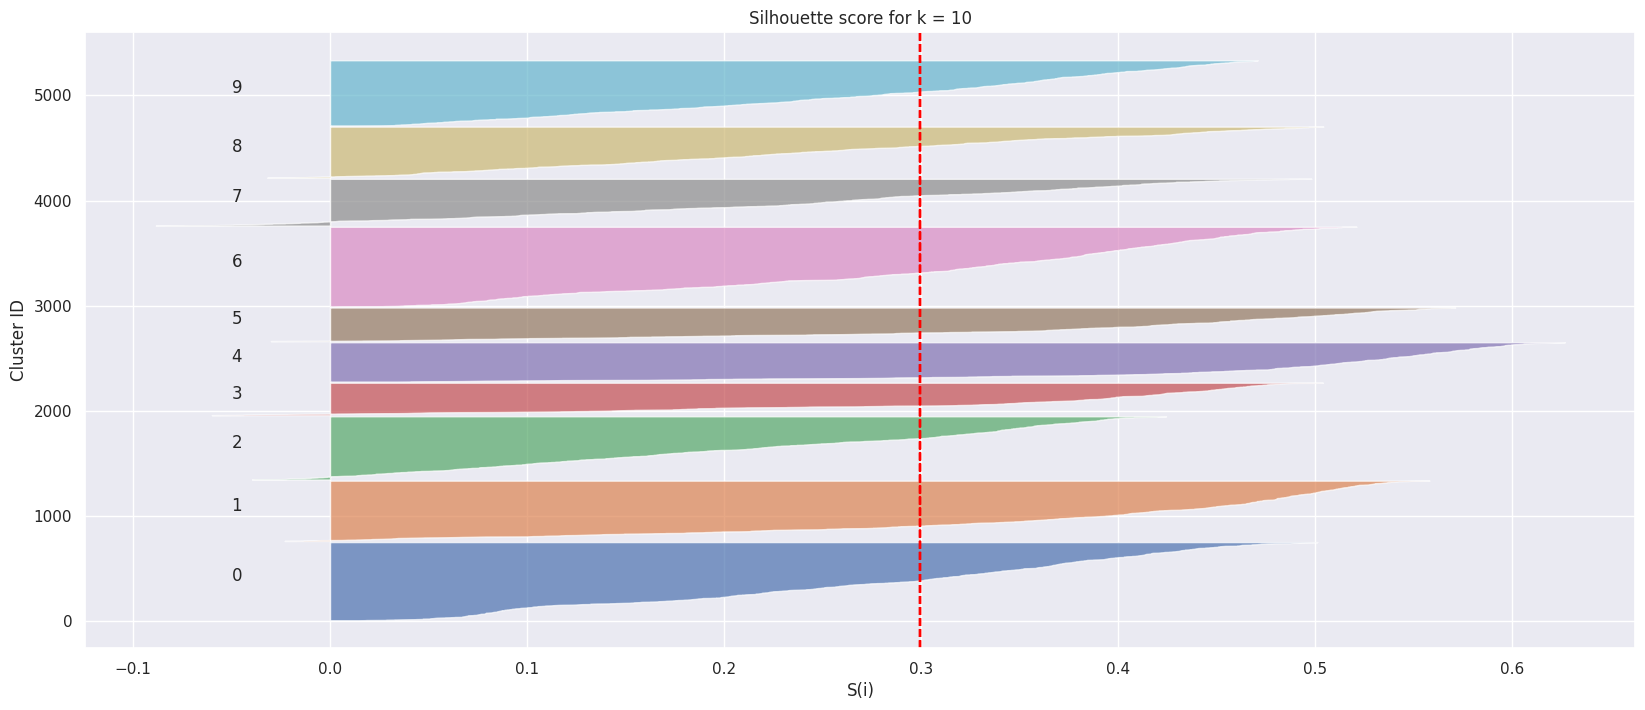

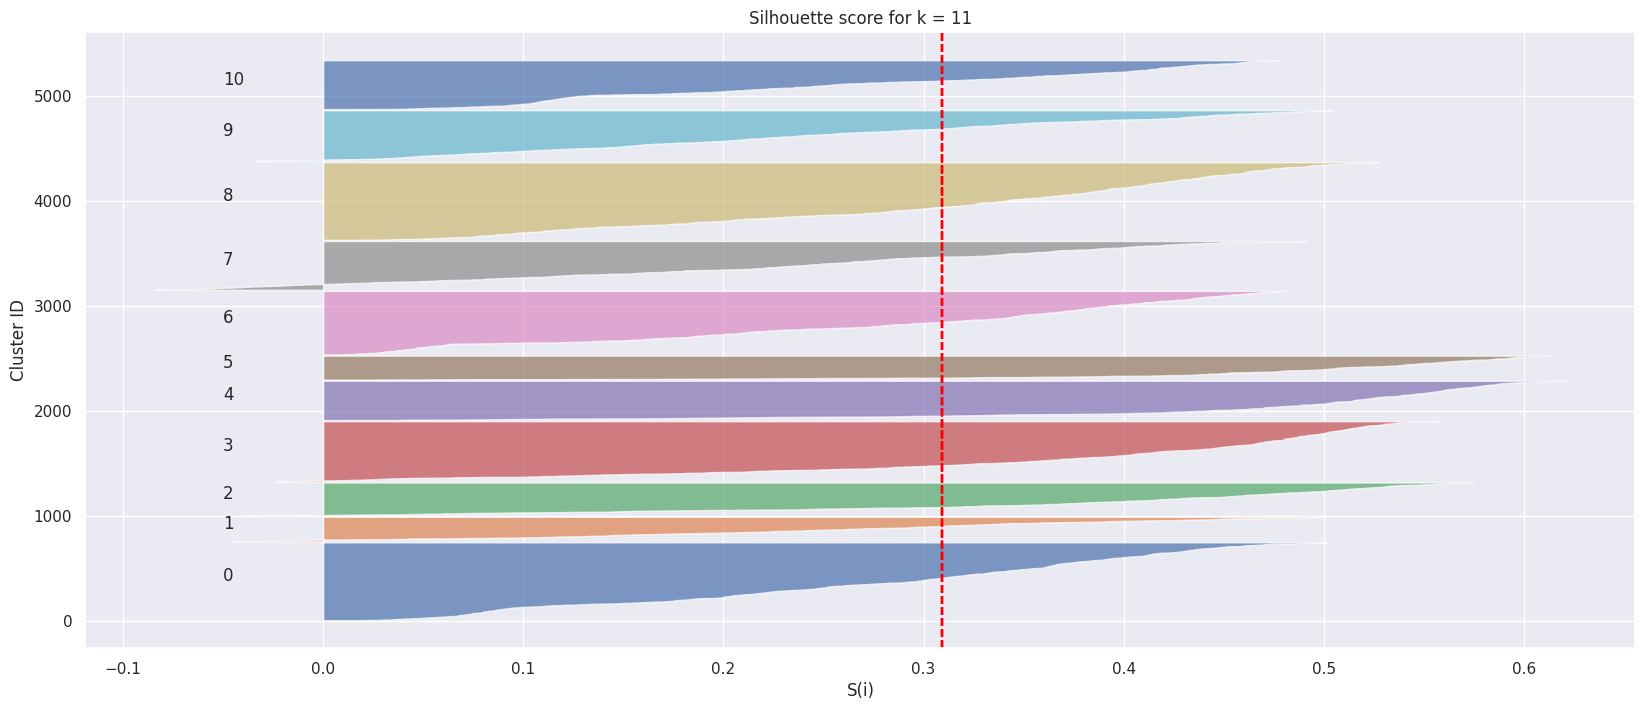

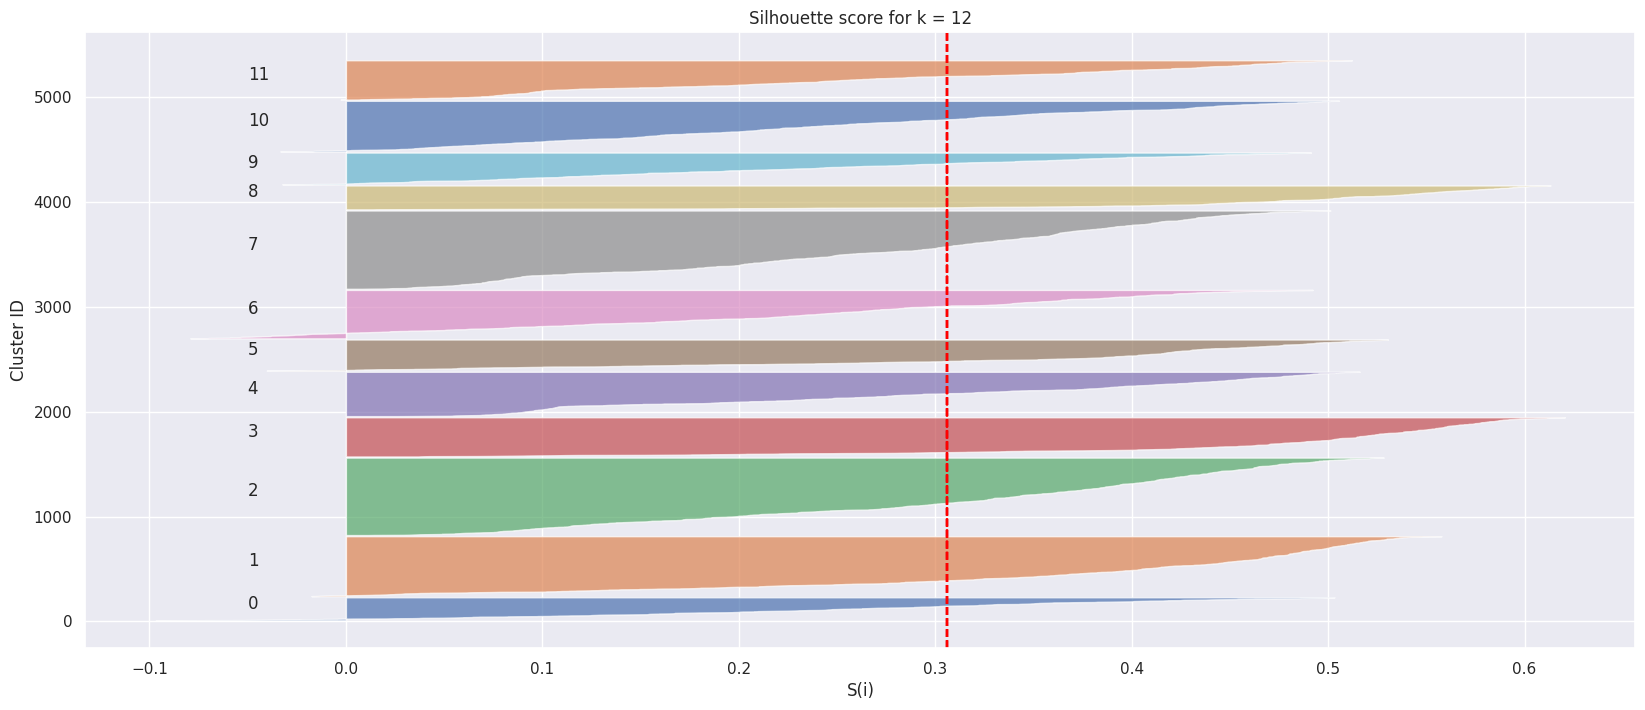

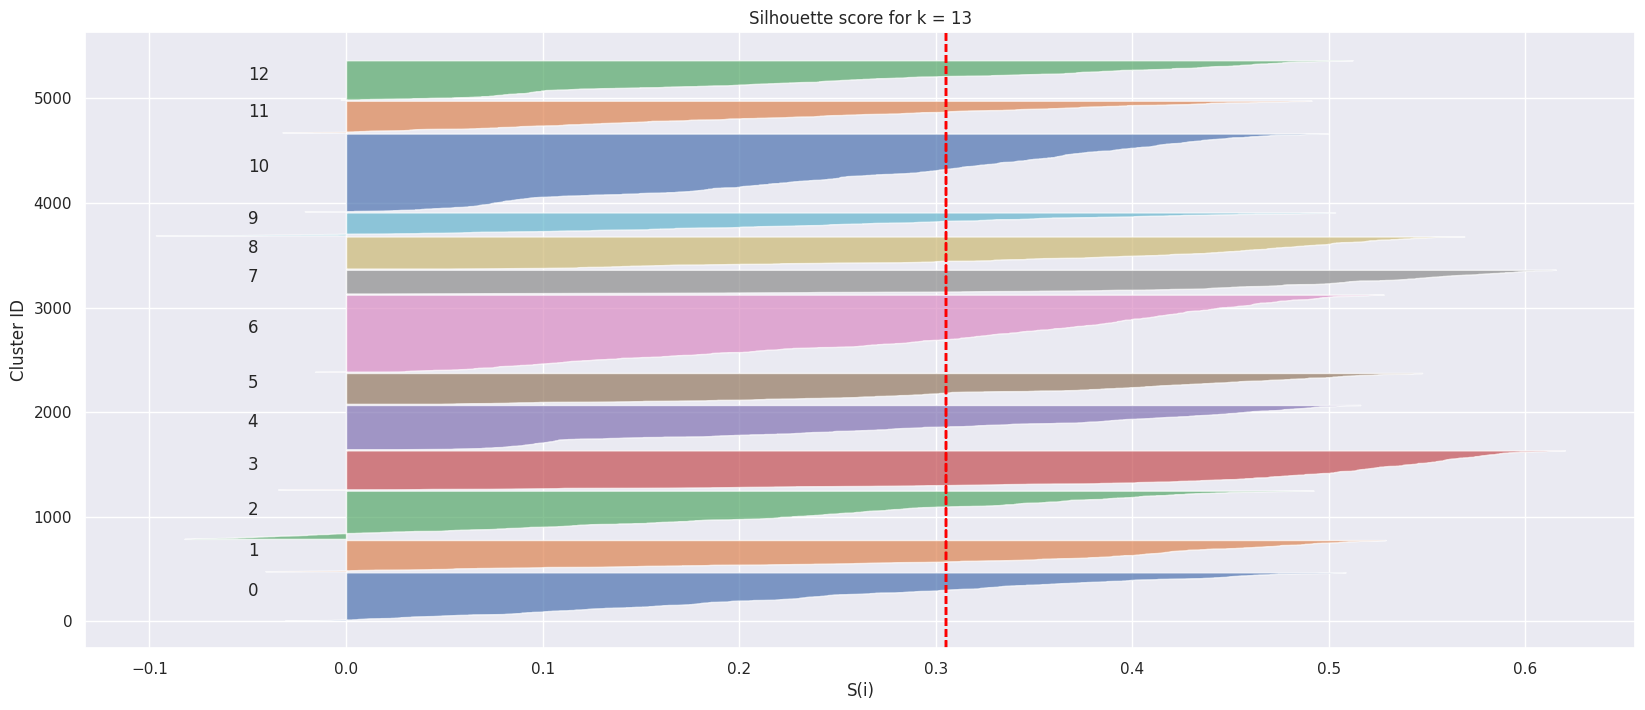

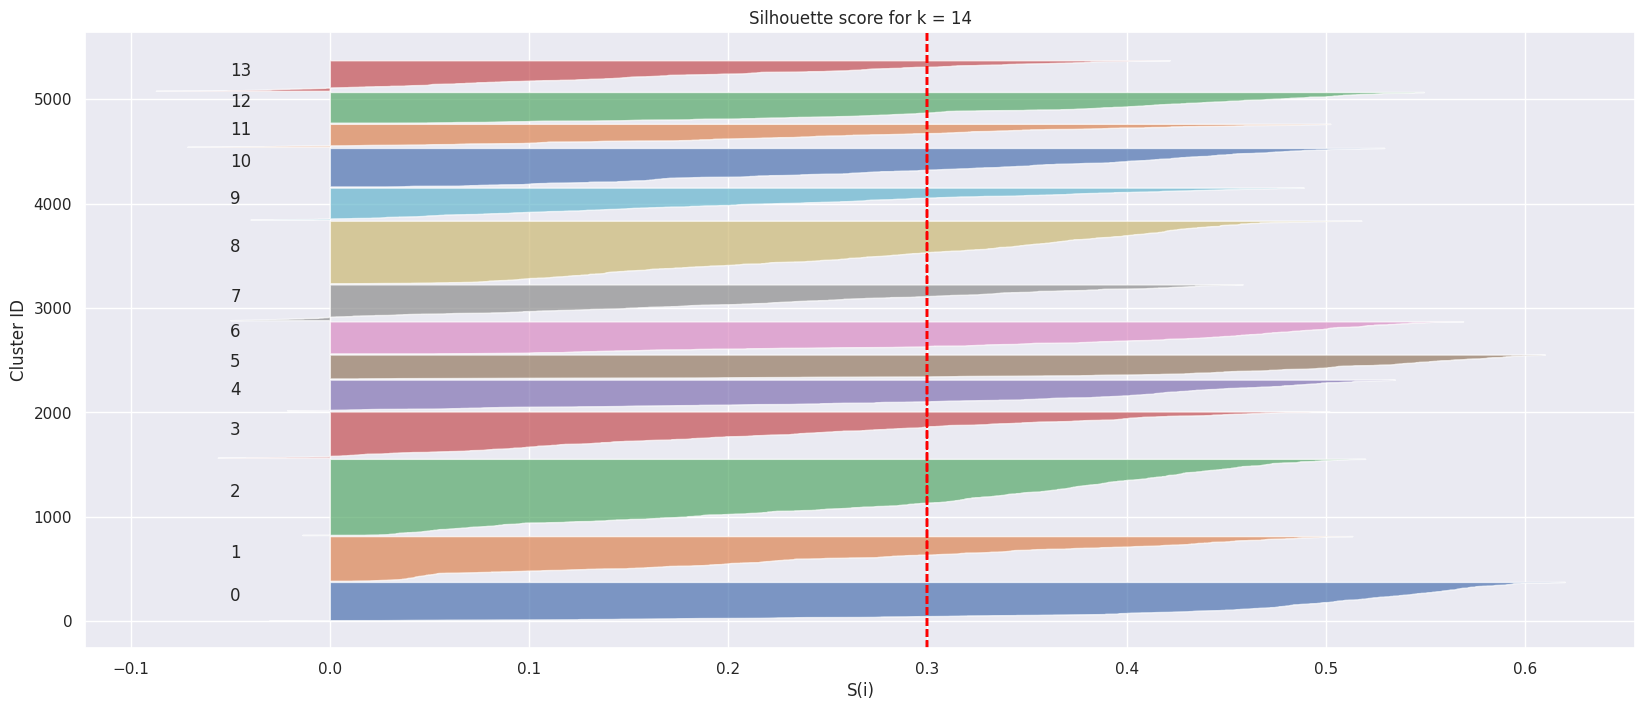

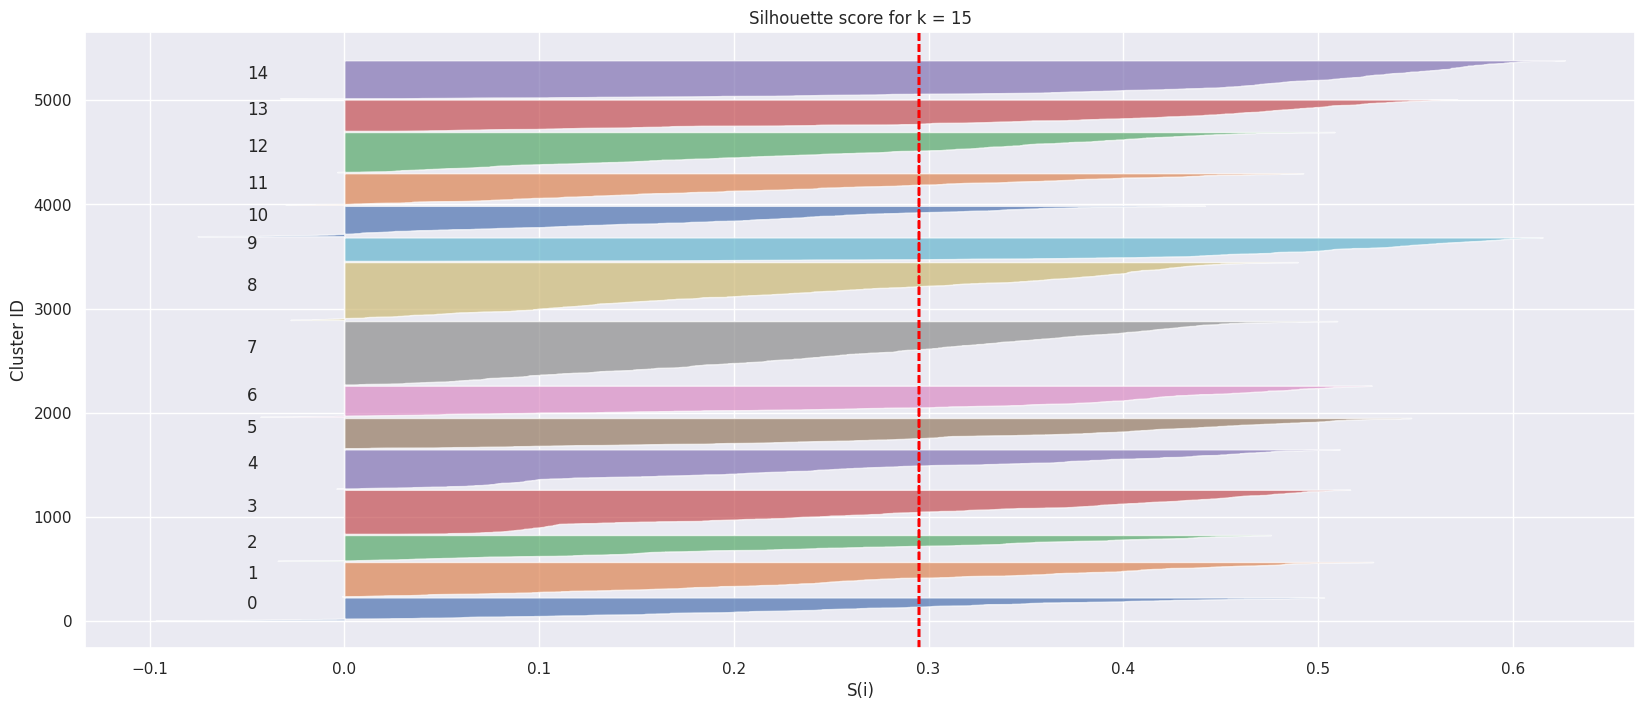

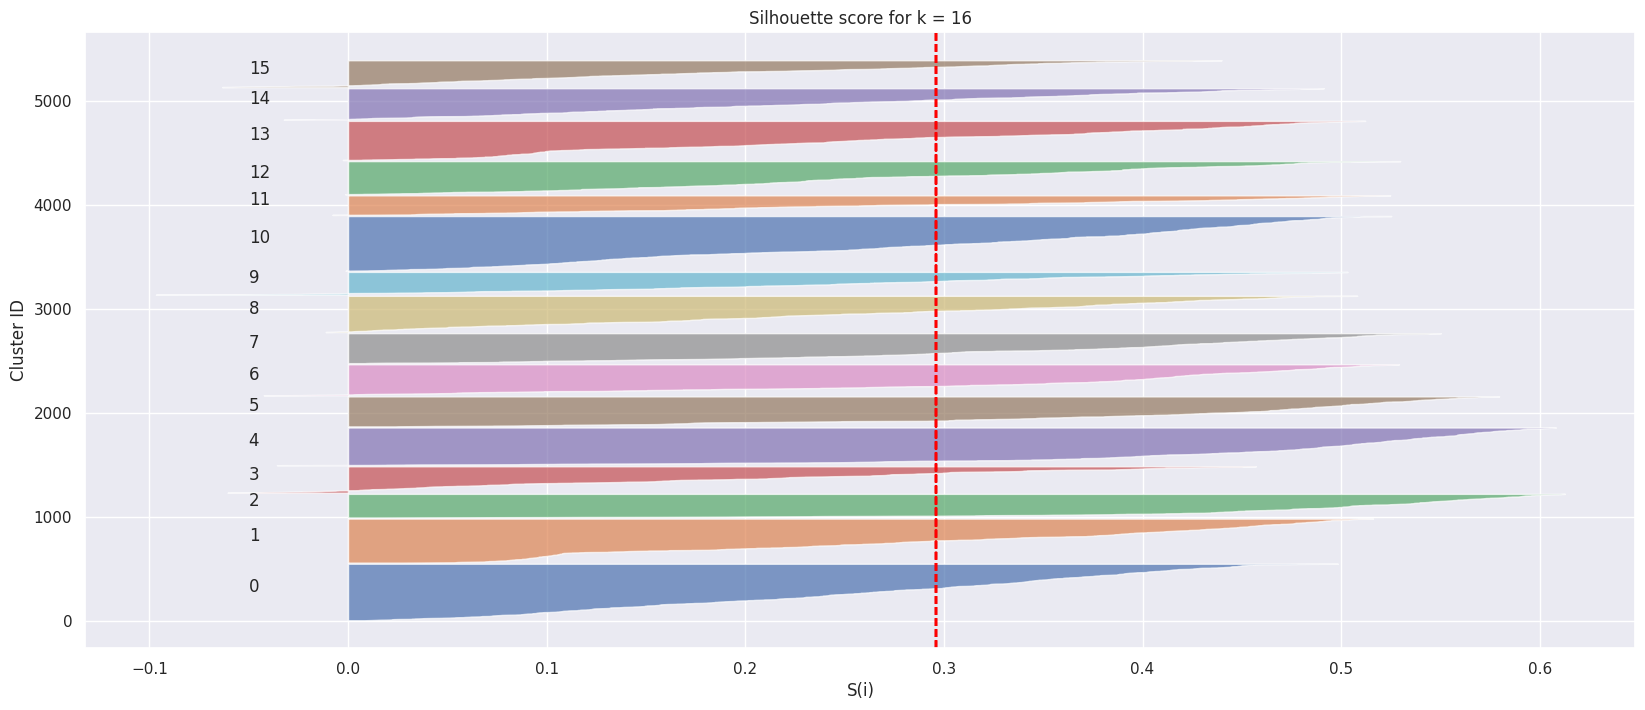

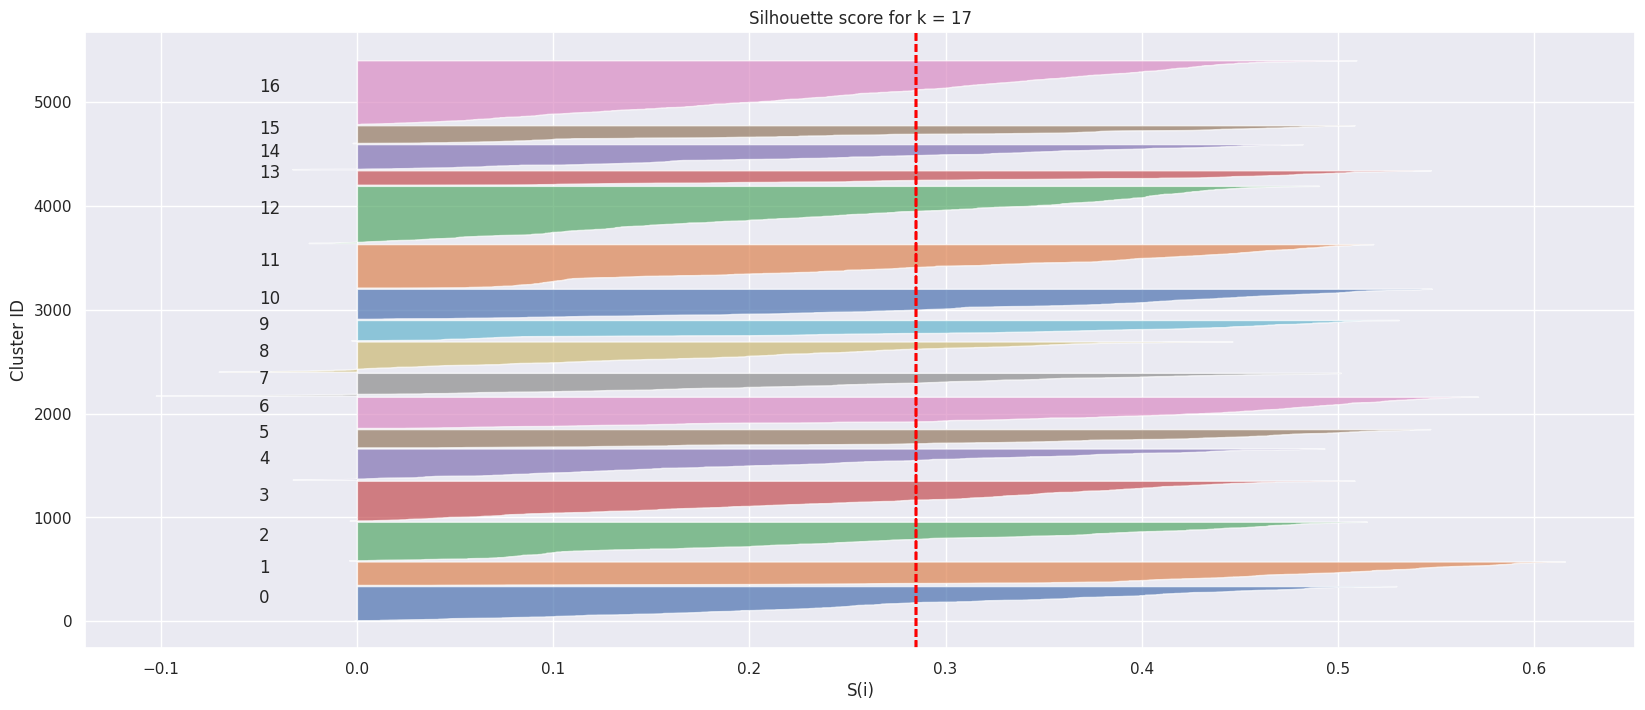

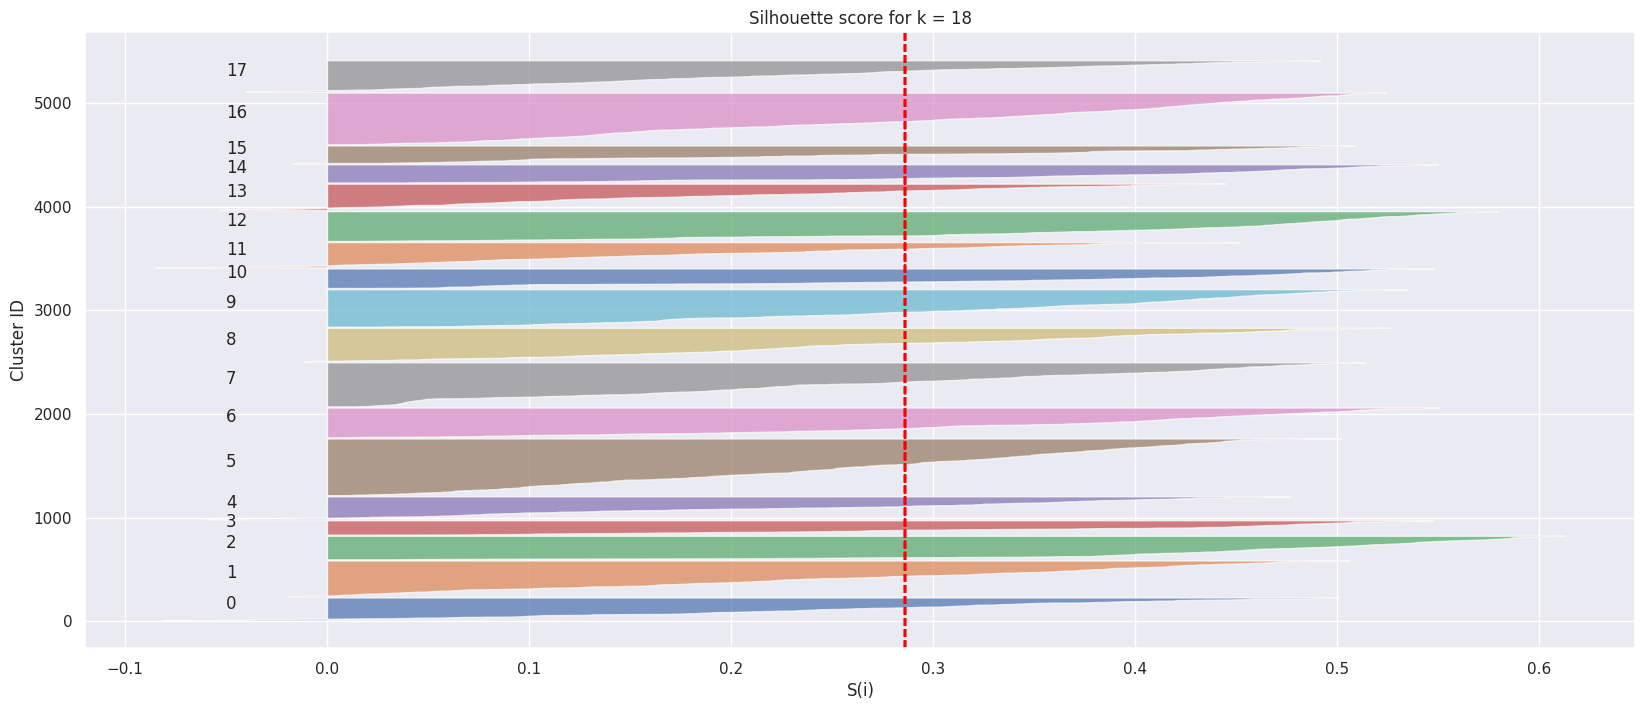

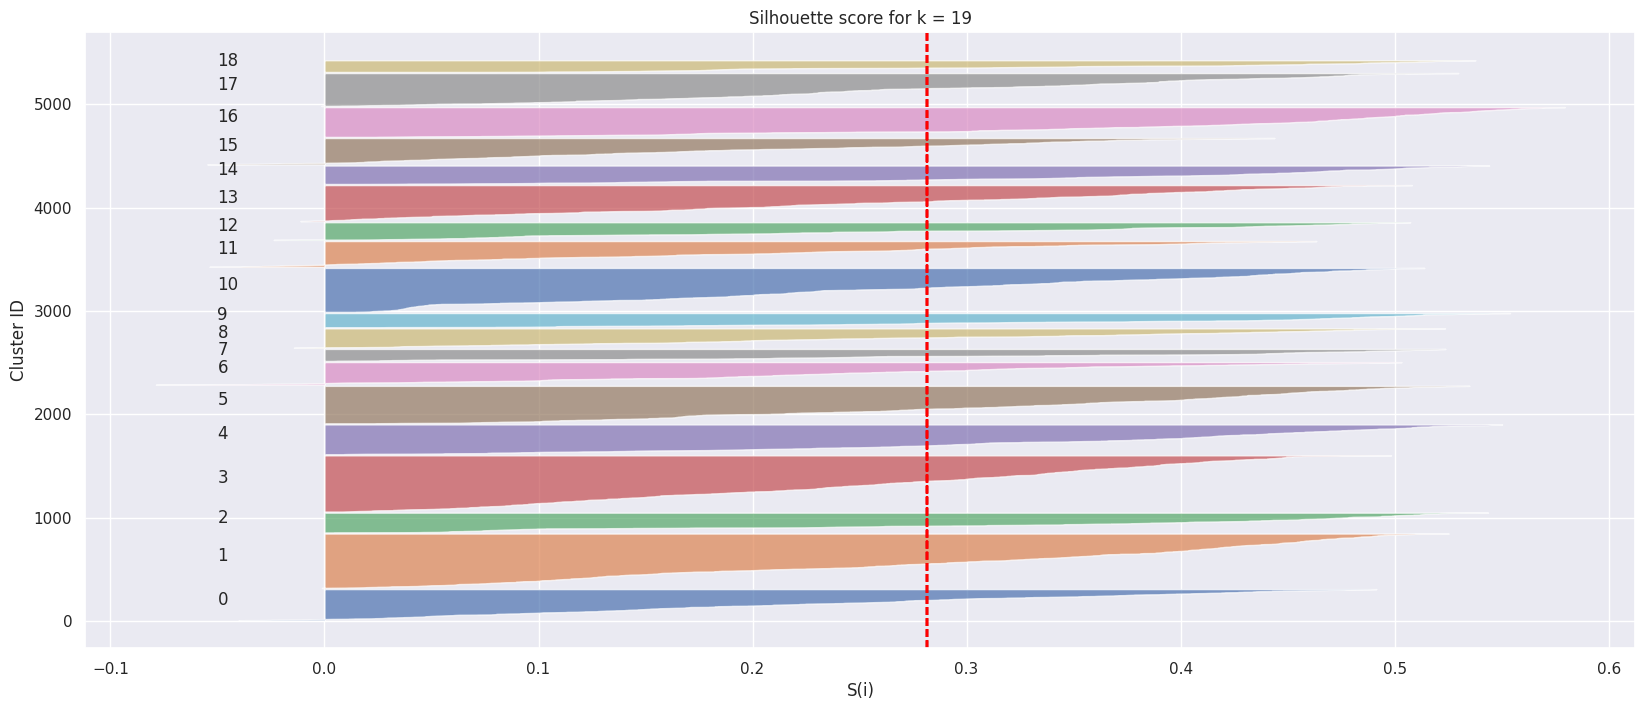

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

max_k = 20
data = songs_norm

for k in range(2, max_k):
    kmean_model = KMeans(n_clusters=k,n_init=10,random_state=123).fit(data)
    labels = kmean_model.labels_

    if 1 < k < data.shape[0]:

        fig, axis1 = plt.subplots(1, 1)
        fig.set_size_inches(20, 8)

        sil_avg = silhouette_score(data, labels)
        print(f"* For k = {k} the average to silhouette is: {round(sil_avg,4)}")
        sample_sil_val = silhouette_samples(data, labels)

        y_lower = 10

        for i in range(k):
            ith_cluster_sv = sample_sil_val[labels == i]
            print(f"\t- For cluster = {i} the silhouette value is: {round(np.mean(ith_cluster_sv),2)}")

            ith_cluster_sv.sort()

            # Calculate where to put the silhuette on the y axes
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size

            silhouette_avg = silhouette_score(data, labels)
            axis1.axvline(x=silhouette_avg, color="red", linestyle="--")
            # Paint the cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv,
                                alpha = 0.7)


            # Label the cluster
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))

            # Calculate the next y lower value for the next cluster of the graph
            y_lower = y_upper + 10 # we left 10 spaces without any observation

        axis1.set_title("Silhouette score for k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")
plt.show();

In [ ]:
songs_kmeans = KMeans(n_clusters=8,random_state=123)

In [ ]:
results = songs_kmeans.fit_predict(songs)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
songs_norm['cluster'] = results
songs_norm.head(5000)

,,danceability,energy,key,mode,acousticness,instrumentalness,valence,cluster
name,artist,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.2590,1.000000,0.0,0.696787,0.000060,0.310660,5
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.3990,0.181818,1.0,0.217871,0.000002,0.703553,0
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.7300,0.181818,1.0,0.454819,0.000064,0.918782,0
Mulher Eu Sei,Chico César,0.729059,0.0502,0.363636,1.0,0.882530,0.000041,0.531980,2
Rosa Morena,Kurt Elling,0.673216,0.1190,0.545455,1.0,0.919679,0.000348,0.408122,3
...,...,...,...,...,...,...,...,...,...
Se Preparó,Ozuna,0.764219,0.8210,0.090909,1.0,0.222892,0.000010,0.703553,6
Una Lady Como Tú,Manuel Turizo,0.814891,0.4770,0.363636,1.0,0.551205,0.000000,0.873096,2
Traicionera,Sebastian Yatra,0.801448,0.6790,1.000000,1.0,0.147590,0.000000,0.684264,5


In [ ]:
songs_norm.groupby('cluster').agg({'danceability' : 'count'})

,danceability
cluster,
0,705
1,681
2,779
3,884
4,572
5,765
6,597
7,252


## Calculating average value of each cluster by two methods:
### - mean()
### - Centroids

In [ ]:
clustered_centroids = songs_norm.groupby('cluster').mean()
clustered_centroids

,danceability,energy,key,mode,acousticness,instrumentalness,valence
cluster,,,,,,,
0,0.492258,0.640205,0.207995,0.782979,0.318159,0.296736,0.414545
1,0.580352,0.721685,0.786277,0.678414,0.202437,0.117210,0.519530
2,0.546451,0.603287,0.412884,0.510911,0.351967,0.245035,0.474071
3,0.529700,0.726053,0.595640,0.671946,0.201175,0.230826,0.457275
4,0.557802,0.596880,0.000000,0.765734,0.357262,0.229064,0.494165
5,0.530302,0.676300,0.957100,0.447059,0.265927,0.241599,0.438639
6,0.520309,0.715215,0.090909,0.708543,0.203927,0.285899,0.444826
7,0.344051,0.321588,0.729798,0.690476,0.717296,0.782503,0.215168


In [ ]:
centroids =songs_kmeans.cluster_centers_
pd.DataFrame(centroids)

,0,1,2,3,4,5,6
0,0.476013,0.640205,2.287943e+00,0.782979,0.316887,0.292285,0.408327
1,0.561201,0.721685,8.649046e+00,0.678414,0.201627,0.115452,0.511737
2,0.528418,0.603287,4.541720e+00,0.510911,0.350559,0.241360,0.466960
3,0.512220,0.726053,6.552036e+00,0.671946,0.200371,0.227364,0.450416
4,0.539395,0.596880,1.687539e-14,0.765734,0.355833,0.225628,0.486753
5,0.512802,0.676300,1.052810e+01,0.447059,0.264863,0.237975,0.432059
6,0.503139,0.715215,1.000000e+00,0.708543,0.203111,0.281610,0.438154
7,0.332698,0.321588,8.027778e+00,0.690476,0.714427,0.770765,0.211940


## Visualize the distances of each clusters with a heatmap

In [ ]:
songs_cent_plot = pd.DataFrame(pairwise_distances(clustered_centroids),
                    index=clustered_centroids.index,
                    columns=clustered_centroids.index)
songs_cent_plot

cluster,0,1,2,3,4,5,6,7
cluster,,,,,,,,
0,0.000000,0.645280,0.357294,0.437292,0.249360,0.826499,0.199365,0.916159
1,0.645280,0.000000,0.472665,0.236125,0.824055,0.336627,0.722586,1.009743
2,0.357294,0.472665,0.000000,0.312899,0.486070,0.560813,0.424709,0.861607
3,0.437292,0.236125,0.312899,0.000000,0.637797,0.434004,0.509405,0.919643
4,0.249360,0.824055,0.486070,0.637797,0.000000,1.017959,0.236897,1.083283
5,0.826499,0.336627,0.560813,0.434004,1.017959,0.000000,0.908912,0.904256
6,0.199365,0.722586,0.424709,0.509405,0.236897,0.908912,0.000000,1.075835
7,0.916159,1.009743,0.861607,0.919643,1.083283,0.904256,1.075835,0.000000


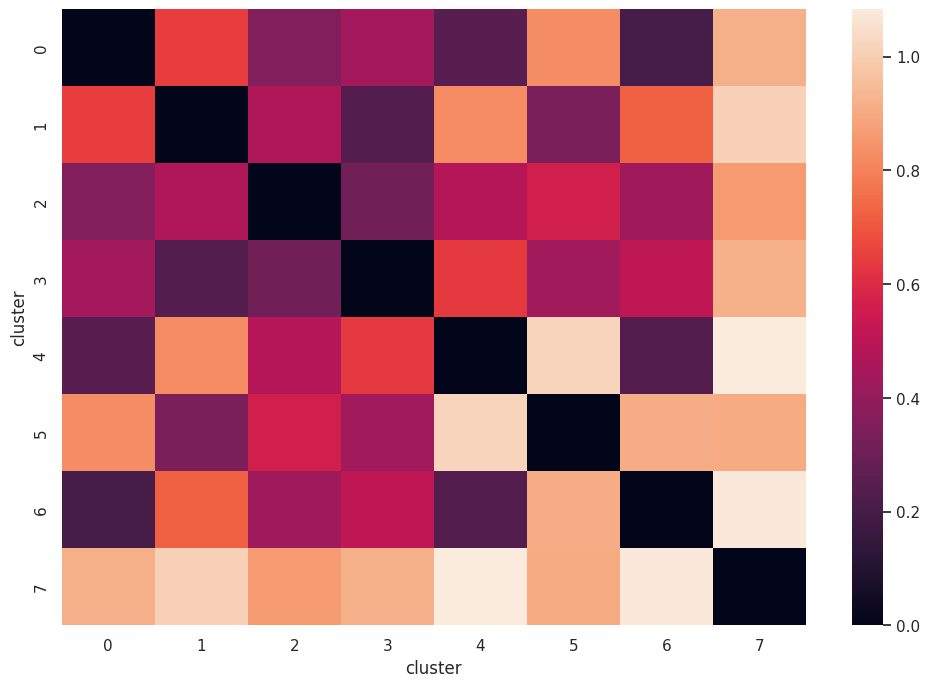

In [ ]:
plt.subplots(figsize=(12, 8))
sns.heatmap(songs_cent_plot);

KeyError: ignored

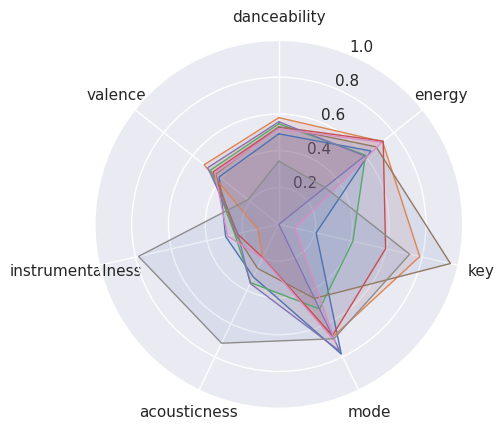

In [ ]:

radar_df = clustered_centroids.reset_index().rename(columns={'index':'cluster'})

# ------- PART 1: Create background

# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# ------- PART 2: Add plots

# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# # Ind1
values=radar_df.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# # Ind2
values=radar_df.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 1")
ax.fill(angles, values, 'r', alpha=0.1)

# # Ind3
values=radar_df.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)

# # Ind4
values=radar_df.loc[3].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 3")
ax.fill(angles, values, 'b', alpha=0.1)

# # Ind5
values=radar_df.loc[4].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 4")
ax.fill(angles, values, 'r', alpha=0.1)

# # Ind6
values=radar_df.loc[5].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 5")
ax.fill(angles, values, 'b', alpha=0.1)

# # Ind7
values=radar_df.loc[6].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 6")
ax.fill(angles, values, 'r', alpha=0.1)

# # Ind8
values=radar_df.loc[7].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 7")
ax.fill(angles, values, 'b', alpha=0.1)


# # Ind9
values=radar_df.loc[8].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 8")
ax.fill(angles, values, 'r', alpha=0.1)

# # Ind10
values=radar_df.loc[9].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 9")
ax.fill(angles, values, 'b', alpha=0.1)


# # Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


# Show the graph
plt.show()

# PCA Method

In [ ]:
# first we need to remove the column 'cluster' and store it for later
clusters = songs_norm.pop('cluster')

Import and use PCA on the 7_feature_dataset

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA and fit the data
pca = PCA(n_components=7)
pca.fit(songs_norm)

In [ ]:
# transform the data
data_songs_pca = pca.transform(songs_norm)
data_songs_pca

In [ ]:
# adds cluster to pca_features
data_songs_pca['cluster'] = clusters

In [ ]:
# plots the pca_features
sns.pairplot(data_songs_pca, hue='cluster', kind="scatter", corner=True)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
sum(pca.explained_variance_ratio_)

In [ ]:
# initialize PCA for covering 90% of variance
pca = PCA(n_components=0.9)

# fit and transform
data_songs_pca = pca.fit_transform(songs_norm)


In [ ]:
# add information on cluster
data_songs_pca['cluster'] = clusters

In [ ]:
# print the output again
sns.pairplot(data_songs_pca, hue='cluster', kind="scatter")

In [ ]:
pca.explained_variance_ratio_

In [ ]:
sum(pca.explained_variance_ratio_)

In [ ]:
data_songs_pca

In [ ]:
data_songs_pca.groupby('cluster').agg({'pca0' : 'count'})